<a href="https://colab.research.google.com/github/knc6/jarvis-tools-notebooks/blob/master/jarvis-tools-notebooks/Basic_UQ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. This code uses the Monte Carlo method to estimate the value of π (pi) by simulating random points in a unit square and determining how many fall inside a quarter circle.

Estimating Pi (3.14159265358979323846264338327950288419716939937510)
### https://www.geeksforgeeks.org/estimating-value-pi-using-monte-carlo/

In [1]:
import numpy as np

# Number of random points
n_points = 1000000

# Generate random points
x = np.random.uniform(0, 1, n_points)
y = np.random.uniform(0, 1, n_points)

# Check if points are inside the quarter circle
inside_circle = (x**2 + y**2) <= 1

# Uses the ratio of points inside the quarter circle to the total number of points to estimate π.

pi_estimate = 4 * np.sum(inside_circle) / n_points
print(f"Estimated value of pi: {pi_estimate}")


Estimated value of pi: 3.140376


2. This code performs a Monte Carlo simulation to evaluate the distribution of the output of a quadratic function given normally distributed input samples. It then visualizes the distribution of the output using a histogram and calculates the mean and standard deviation of the output.

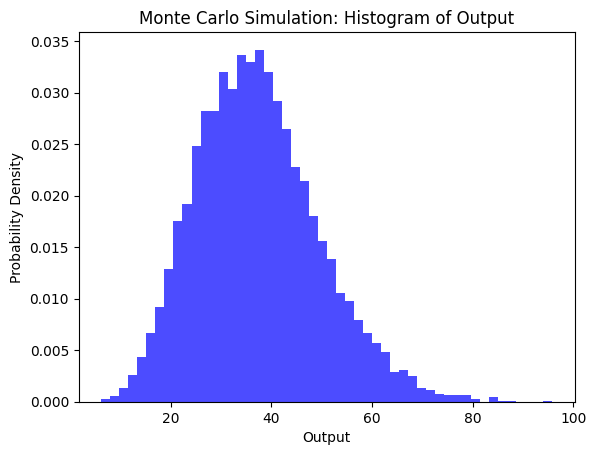

Mean of output: 37.27
Standard deviation of output: 12.16


In [2]:
#
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Define the function
def f(x):
    return x**2 + 2*x + 1

# Number of samples
N = 10000

# Generate random samples for input variable x (assuming normal distribution)
mean_x = 5
std_x = 1
x_samples = np.random.normal(mean_x, std_x, N)

# Compute the output for each sample
y_samples = f(x_samples)

# Plot the histogram of the output
plt.hist(y_samples, bins=50, density=True, alpha=0.7, color='blue')
plt.title('Monte Carlo Simulation: Histogram of Output')
plt.xlabel('Output')
plt.ylabel('Probability Density')
plt.show()

# Calculate mean and standard deviation of the output
mean_y = np.mean(y_samples)
std_y = np.std(y_samples)
print(f'Mean of output: {mean_y:.2f}')
print(f'Standard deviation of output: {std_y:.2f}')


3. This code performs a Monte Carlo simulation to estimate the probability of failure of a mechanical component under load, considering the randomness in both the load and the material strength.

In [ ]:
import numpy as np

# Define parameters
n_simulations = 10000
mean_load = 500
std_load = 50
mean_strength = 600
std_strength = 50

# Generate random samples
load_samples = np.random.normal(mean_load, std_load, n_simulations)
strength_samples = np.random.normal(mean_strength, std_strength, n_simulations)

# Determine failure
failures = load_samples > strength_samples

# Estimate probability of failure
probability_of_failure = np.mean(failures)
print(f"Estimated Probability of Failure: {probability_of_failure:.2f}")


Estimated Probability of Failure: 0.07


4. This code uses Latin Hypercube Sampling (LHS) to generate samples for two input variables, X1 and X2 , uniformly distributed between 0 and 1. LHS is a statistical method that ensures each sample is representative of the entire range of each input variable.

In [ ]:
!pip install -q pyDOE

  Preparing metadata (setup.py) ... done


In [ ]:
#Generating 4 samples for two input variables \( X_1 \) and \( X_2 \) uniformly distributed between 0 and 1.
import numpy as np
from pyDOE import lhs

# Number of samples
n_samples = 4

# Generate LHS samples
lhs_samples = lhs(2, samples=n_samples)

# Scale samples to desired range [0, 1]
lhs_samples_scaled = lhs_samples * (1 - 0) + 0

print("LHS Samples:")
print(lhs_samples_scaled)


LHS Samples:
[[0.24406955 0.12474267]
 [0.93714431 0.55290151]
 [0.43227837 0.81390031]
 [0.71200331 0.46465837]]


Each row represents a sample, and each column corresponds to one of the input variables
X1 and X2. This ensures that the entire range of possible values for each variable is covered more uniformly than with simple random sampling.

5. This code demonstrates the use of Latin Hypercube Sampling (LHS) to generate input samples for a given function, compute the corresponding outputs, and analyze the distribution of these outputs through a histogram. It also calculates the mean and standard deviation of the outputs.

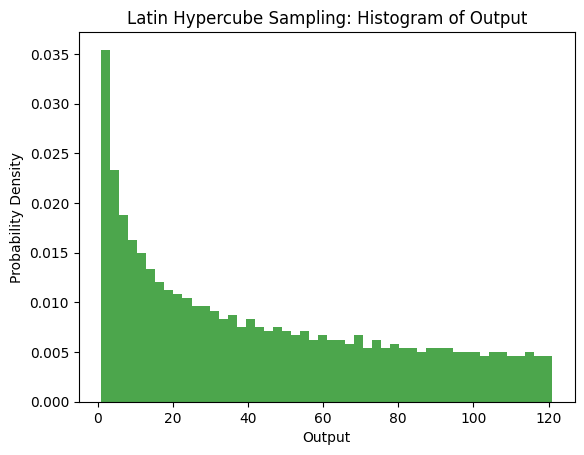

Mean of output: 44.33
Standard deviation of output: 35.44


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pyDOE import lhs

# Define the function
def f(x):
    return x**2 + 2*x + 1

# Number of samples
N = 1000

# Generate Latin Hypercube samples for input variable x
lhs_samples = lhs(1, samples=N)
x_samples = 10 * lhs_samples[:, 0]  # Scale to desired range [0, 10]

# Compute the output for each sample
y_samples = f(x_samples)

# Plot the histogram of the output
plt.hist(y_samples, bins=50, density=True, alpha=0.7, color='green')
plt.title('Latin Hypercube Sampling: Histogram of Output')
plt.xlabel('Output')
plt.ylabel('Probability Density')
plt.show()

# Calculate mean and standard deviation of the output
mean_y = np.mean(y_samples)
std_y = np.std(y_samples)
print(f'Mean of output: {mean_y:.2f}')
print(f'Standard deviation of output: {std_y:.2f}')


 6. This code performs Polynomial Chaos Expansion (PCE) using a polynomial regression model to estimate the probability of failure of a mechanical component under random load and material strength conditions. The steps include generating random samples, creating polynomial features, fitting a linear regression model, and evaluating the model on new samples.

In [ ]:
import numpy as np
from scipy.stats import norm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Define parameters
n_samples = 1000
mean_load, std_load = 500, 50
mean_strength, std_strength = 600, 50

# Generate random samples
L_samples = np.random.normal(mean_load, std_load, n_samples)
S_samples = np.random.normal(mean_strength, std_strength, n_samples)
failure_samples = (L_samples > S_samples).astype(int)

# Create polynomial features
poly = PolynomialFeatures(degree=3)
X = np.vstack((L_samples, S_samples)).T
X_poly = poly.fit_transform(X)

# Fit PCE model using linear regression
model = LinearRegression()
model.fit(X_poly, failure_samples)
coefficients = model.coef_

# Function to evaluate PCE model
def evaluate_pce(L, S, model, poly):
    X = np.vstack((L, S)).T
    X_poly = poly.transform(X)
    return model.predict(X_poly)

# Evaluate PCE model on new samples
new_L_samples = np.random.normal(mean_load, std_load, n_samples)
new_S_samples = np.random.normal(mean_strength, std_strength, n_samples)
predicted_failures = evaluate_pce(new_L_samples, new_S_samples, model, poly)

# Estimate probability of failure
probability_of_failure = np.mean(predicted_failures)
print(f"Estimated Probability of Failure: {probability_of_failure:.2f}")


Estimated Probability of Failure: 0.07


In [ ]:
 pip install bayesian-optimization

7.  This code uses Bayesian Optimization to find the maximum value of a given function within a specified range. The function to be optimized is ( -sin(3x) - x^2 + 0.7x ). The code initializes the Bayesian optimizer, performs the optimization, and then visualizes the results.


|   iter    |  target   |     x     |
-------------------------------------
| 1         | -0.7086   | 0.834     |
| 2         | -0.1423   | 1.441     |
| 3         | -0.1391   | 1.438     |
| 4         | 0.0       | 0.0       |
| 5         | -0.5841   | 0.2576    |
| 6         | -2.321    | 2.0       |
| 7         | -0.2313   | 1.137     |
| 8         | -0.1006   | 1.277     |
| 9         | -0.1193   | 0.05099   |
| 10        | -0.1193   | 0.05099   |
| 11        | -0.1193   | 0.05099   |
| 12        | -0.1193   | 0.05099   |


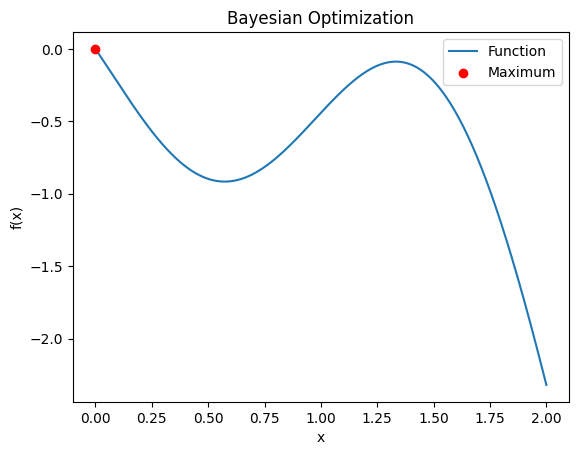

Optimal value: x = 0.00, f(x) = 0.00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from bayes_opt import BayesianOptimization

# Define the function to minimize
def f(x):
    return -np.sin(3*x) - x**2 + 0.7*x

# Define the bounds of the search space
pbounds = {'x': (0, 2)}

# Initialize the optimizer
optimizer = BayesianOptimization(f=f, pbounds=pbounds, verbose=2, random_state=1)

# Perform the optimization
optimizer.maximize(init_points=2, n_iter=10)

# Extract the results
x = np.linspace(0, 2, 1000)
y = f(x)
max_x = optimizer.max['params']['x']
max_y = f(max_x)

# Plot the results
plt.plot(x, y, label='Function')
plt.scatter([max_x], [max_y], color='red', zorder=5, label='Maximum')
plt.title('Bayesian Optimization')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

print(f'Optimal value: x = {max_x:.2f}, f(x) = {max_y:.2f}')


8. Gaussian Process Regression (GPR): Suppose we want to model the relationship between the load applied to a mechanical system and its resulting displacement, given a set of noisy measurements. This code demonstrates how to use Gaussian Process Regression (GPR) to model a function based on training data and predict its behavior over a range of input values. It visualizes the predictions along with the 95% confidence interval, showing the uncertainty in the predictions.

Different types of Kernel functions

For each kernel, the script generates samples from the GP prior using gp.sample_y(X, n_samples=3), which gives us an idea of the kinds of functions that each kernel can model.

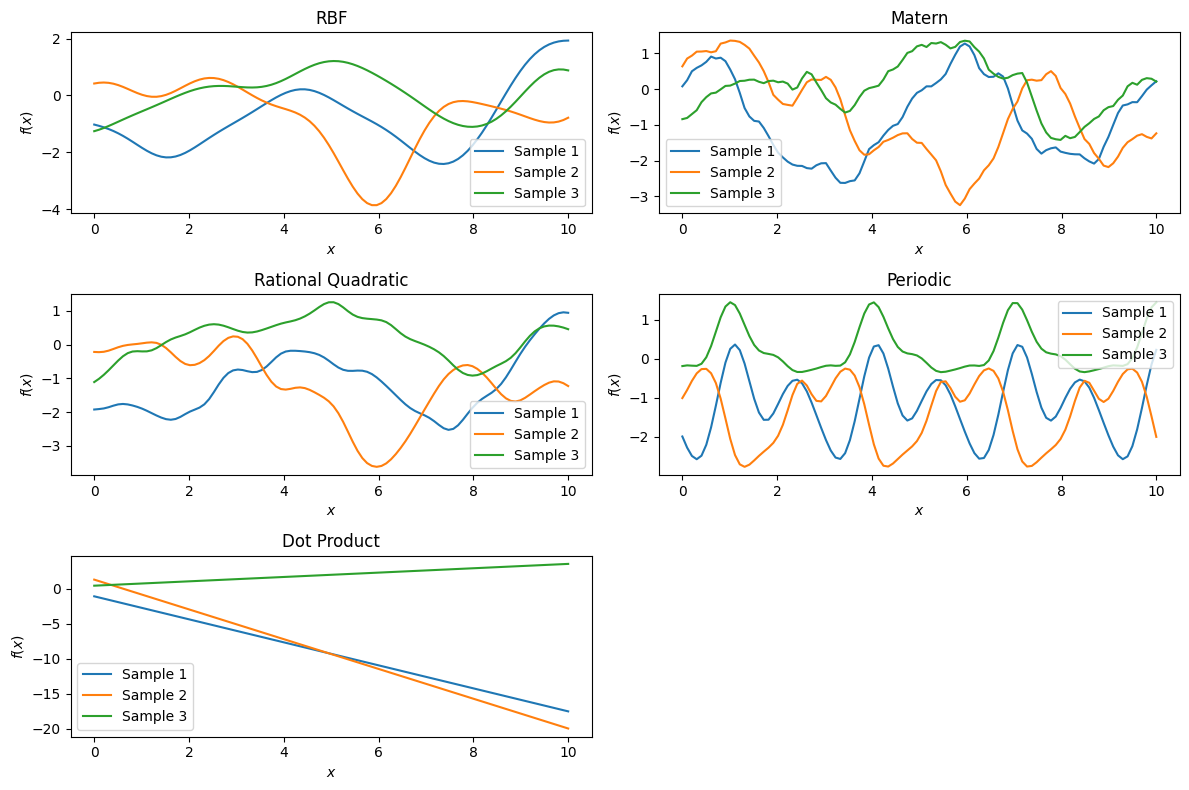

In [3]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, RationalQuadratic, ExpSineSquared, DotProduct, ConstantKernel as C
# Define a range of input points
X = np.linspace(0, 10, 100).reshape(-1, 1)
# Define kernels
kernels = [
    C(1.0, (1e-3, 1e3)) * RBF(length_scale=1),
    C(1.0, (1e-3, 1e3)) * Matern(length_scale=1, nu=1.5),
    C(1.0, (1e-3, 1e3)) * RationalQuadratic(length_scale=1, alpha=0.5),
    C(1.0, (1e-3, 1e3)) * ExpSineSquared(length_scale=1, periodicity=3),
    DotProduct() + C(1.0)
]

kernel_names = [
    "RBF",
    "Matern",
    "Rational Quadratic",
    "Periodic",
    "Dot Product"
]

# Generate samples from each kernel
plt.figure(figsize=(12, 8))
for kernel, name in zip(kernels, kernel_names):
    gp = GaussianProcessRegressor(kernel=kernel)
    y_samples = gp.sample_y(X, n_samples=3)
    plt.subplot(3, 2, kernel_names.index(name) + 1)
    for i in range(y_samples.shape[1]):
        plt.plot(X, y_samples[:, i], label=f'Sample {i+1}')
    plt.title(name)
    plt.xlabel('$x$')
    plt.ylabel('$f(x)$')
    plt.legend()

plt.tight_layout()
plt.show()


### https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_noisy_targets.html

In [4]:
Suppose we have a few measurement points and we want to develop a model for future prediction with uncertainty estimates
The ground truth function is assumed as xsin(x) [Note: this is not always known for real world scenarios]


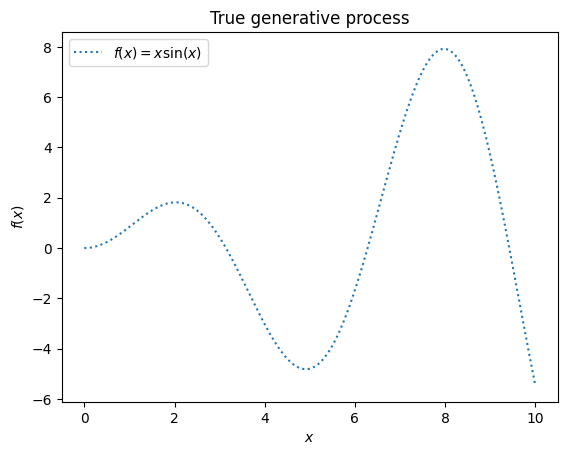

In [5]:
import numpy as np

X = np.linspace(start=0, stop=10, num=1_000).reshape(-1, 1)
y = np.squeeze(X * np.sin(X))
import matplotlib.pyplot as plt

plt.plot(X, y, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("True generative process")

Now we take six random values on the curve as experimental measurements and from their try to develop a model that should resemble the ground trutch function in addition to giving uncertainty esimates.

In [6]:
rng = np.random.RandomState(1)
training_indices = rng.choice(np.arange(y.size), size=6, replace=False)
X_train, y_train = X[training_indices], y[training_indices]

In [7]:
X_train, y_train

(array([[5.07507508],
        [8.18818819],
        [4.52452452],
        [3.68368368],
        [2.42242242],
        [9.2992993 ]]),
 array([-4.74492726,  7.73514288, -4.44491693, -1.90051689,  1.5957965 ,
         1.16380401]))

In [8]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gaussian_process.fit(X_train, y_train)
gaussian_process.kernel_

5.02**2 * RBF(length_scale=1.43)

Mean and Standard deviation predictor

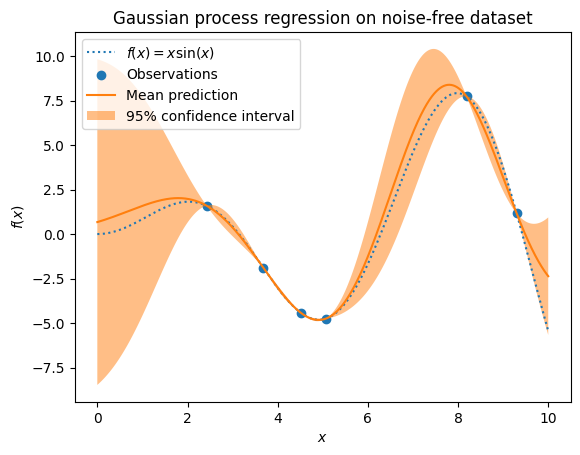

In [9]:
mean_prediction, std_prediction = gaussian_process.predict(X, return_std=True)

plt.plot(X, y, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
plt.scatter(X_train, y_train, label="Observations")
plt.plot(X, mean_prediction, label="Mean prediction")
plt.fill_between(
    X.ravel(),
    mean_prediction - 1.96 * std_prediction,
    mean_prediction + 1.96 * std_prediction,
    alpha=0.5,
    label=r"95% confidence interval",
)
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("Gaussian process regression on noise-free dataset")

9. Prediction Intervals: https://developer.ibm.com/articles/prediction-intervals-explained-a-lightgbm-tutorial/

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002669 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 16512, number of used features: 8
[LightGBM] [Info] Start training from score 2.071947
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002575 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 16512, number of used features: 8
[LightGBM] [Info] Start training from score 0.665000
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002406 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 16512, number of used features: 8
[LightGBM] [Info] Start traini

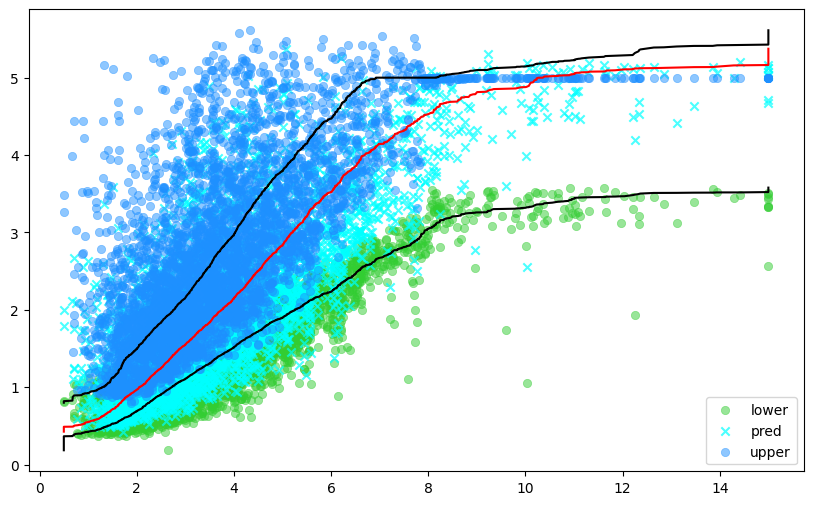

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
%matplotlib inline
import matplotlib.pyplot as plt
def sklearn_to_df(data_loader):
    X_data = data_loader.data
    X_columns = data_loader.feature_names
    x = pd.DataFrame(X_data, columns=X_columns)

    y_data = data_loader.target
    y = pd.Series(y_data, name='target')

    return x, y
x, y = sklearn_to_df(fetch_california_housing())

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42)

import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
#from data_loader import x_train, x_test, y_train, y_test

regressor = lgb.LGBMRegressor()
regressor.fit(x_train, y_train)
regressor_pred = regressor.predict(x_test)

lower = lgb.LGBMRegressor(objective = 'quantile', alpha = 1 - 0.95)
lower.fit(x_train, y_train)
lower_pred = lower.predict(x_test)


upper = lgb.LGBMRegressor(objective = 'quantile', alpha = 0.95)
upper.fit(x_train, y_train)
upper_pred = upper.predict(x_test)

score = r2_score(y_test, regressor_pred)
print('score',score)


plt.figure(figsize=(10, 6))

plt.scatter(x_test.MedInc, lower_pred, color='limegreen', marker='o', label='lower', lw=0.5, alpha=0.5)
plt.scatter(x_test.MedInc, regressor_pred, color='aqua', marker='x', label='pred', alpha=0.7)
plt.scatter(x_test.MedInc, upper_pred, color='dodgerblue', marker='o', label='upper', lw=0.5, alpha=0.5)
plt.plot(sorted(x_test.MedInc), sorted(lower_pred), color='black')
plt.plot(sorted(x_test.MedInc), sorted(regressor_pred), color='red')
plt.plot(sorted(x_test.MedInc), sorted(upper_pred), color='black')
plt.legend()

plt.show()

Additonal metrics calculation for uncertainty such as Sharpness

In [10]:
!pip install -q uncertainty-toolbox

10. Uncertainty Metrics: This example computes metrics for a vector of predicted values (predictions) and associated uncertainties (predictions_std, a vector of standard deviations), taken with respect to a corresponding set of ground truth values y.

In [ ]:
import uncertainty_toolbox as uct

# Load an example dataset of 100 predictions, uncertainties, and ground truth values
predictions, predictions_std, y, x = uct.data.synthetic_sine_heteroscedastic(100)

# Compute all uncertainty metrics
metrics = uct.metrics.get_all_metrics(predictions, predictions_std, y)

 (1/n) Calculating accuracy metrics
 (2/n) Calculating average calibration metrics
 (3/n) Calculating adversarial group calibration metrics
  [1/2] for mean absolute calibration error
Measuring adversarial group calibration by spanning group size between 0.0 and 1.0, in 10 intervals


100%|██████████| 10/10 [00:02<00:00,  3.68it/s]


  [2/2] for root mean squared calibration error
Measuring adversarial group calibration by spanning group size between 0.0 and 1.0, in 10 intervals


100%|██████████| 10/10 [00:05<00:00,  1.80it/s]


 (4/n) Calculating sharpness metrics
 (n/n) Calculating proper scoring rule metrics
**Finished Calculating All Metrics**


===================== Accuracy Metrics =====================
  MAE           0.309
  RMSE          0.444
  MDAE          0.187
  MARPD         57.920
  R2            0.737
  Correlation   0.860
=============== Average Calibration Metrics ================
  Root-mean-squared Calibration Error   0.036
  Mean-absolute Calibration Error       0.031
  Miscalibration Area                   0.031
========== Adversarial Group Calibration Metrics ===========
  Mean-absolute Adversarial Group Calibration Error
     Group Size: 0.11 -- Calibration Error: 0.163
     Group Size: 0.56 -- Calibration Error: 0.066
     Group Size: 1.00 -- Calibration Error: 0.031
  Root-mean-squared Adversarial Group Calibration Error
     Group Size: 0.11 -- Calibration Error: 0.192
     Group Size: 0.56 -- Calibration Error: 0.080
     Group Size: 1.00 -- Calibration Error: 0.036
===============

Extras

In [ ]:
!pip install -q chaospy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.0/254.0 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.1/148.1 kB 12.5 MB/s eta 0:00:00


Example Sobol Sensitivity Analysis: This example demonstrates how to perform Sobol sensitivity analysis to determine the sensitivity of the output with respect to input variables.

In [ ]:
pip install -q SALib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 778.8/778.8 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.2 MB/s eta 0:00:00


<ipython-input-10-2ecaa3ad2ac6>:19: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5.1 Please use `salib.sample.sobol`
  param_values = saltelli.sample(problem, 1000)
/usr/local/lib/python3.10/dist-packages/SALib/sample/saltelli.py:110: UserWarning: 
        Convergence properties of the Sobol' sequence is only valid if
        `N` (1000) is equal to `2^n`.
        
  warnings.warn(msg)


First-order indices: [ 0.17083529  0.62419573 -0.00323803  0.00170401]
Second-order indices: [[        nan -0.00519169 -0.0033711  -0.00125131]
 [        nan         nan  0.00406611  0.0014575 ]
 [        nan         nan         nan  0.21252934]
 [        nan         nan         nan         nan]]
Total-order indices: [0.16819911 0.62563663 0.20859542 0.20646136]


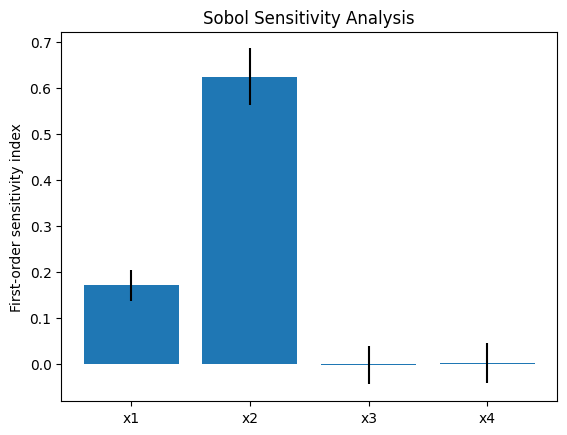

In [ ]:
import numpy as np
import SALib
from SALib.sample import saltelli
from SALib.analyze import sobol
import matplotlib.pyplot as plt

# Define the function
def f(x):
    return x[:, 0]**2 + x[:, 1] + x[:, 2]*x[:, 3]

# Define the problem
problem = {
    'num_vars': 4,
    'names': ['x1', 'x2', 'x3', 'x4'],
    'bounds': [[-1, 1], [-1, 1], [-1, 1], [-1, 1]]
}

# Generate samples
param_values = saltelli.sample(problem, 1000)

# Evaluate the function
Y = f(param_values)

# Perform Sobol sensitivity analysis
Si = sobol.analyze(problem, Y)

# Print the first-order, second-order and total-order indices
print("First-order indices:", Si['S1'])
print("Second-order indices:", Si['S2'])
print("Total-order indices:", Si['ST'])

# Plot the results
fig, ax = plt.subplots()
ax.bar(problem['names'], Si['S1'], yerr=Si['S1_conf'])
ax.set_title('Sobol Sensitivity Analysis')
ax.set_ylabel('First-order sensitivity index')
plt.show()


Example 5: Bootstrapping
Description: This example demonstrates how to use bootstrapping to estimate the uncertainty in the mean of a dataset.

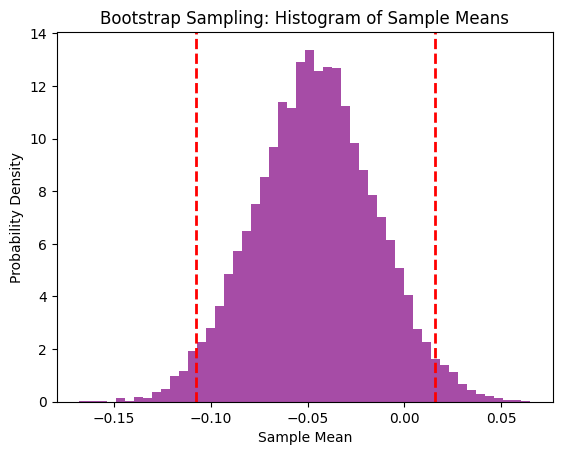

95% confidence interval for the mean: [-0.11, 0.02]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(0)
data = np.random.normal(loc=0, scale=1, size=1000)

# Number of bootstrap samples
B = 10000
bootstrap_means = np.zeros(B)

# Perform bootstrapping
for i in range(B):
    bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
    bootstrap_means[i] = np.mean(bootstrap_sample)

# Calculate confidence intervals
ci_lower = np.percentile(bootstrap_means, 2.5)
ci_upper = np.percentile(bootstrap_means, 97.5)

# Plot the results
plt.hist(bootstrap_means, bins=50, density=True, alpha=0.7, color='purple')
plt.axvline(ci_lower, color='red', linestyle='dashed', linewidth=2)
plt.axvline(ci_upper, color='red', linestyle='dashed', linewidth=2)
plt.title('Bootstrap Sampling: Histogram of Sample Means')
plt.xlabel('Sample Mean')
plt.ylabel('Probability Density')
plt.show()

print(f'95% confidence interval for the mean: [{ci_lower:.2f}, {ci_upper:.2f}]')


Example 6: Bayesian Inference with MCMC
Description: This example demonstrates how to use Markov Chain Monte Carlo (MCMC) for Bayesian inference.

In [ ]:
pip install pymc3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 872.6/872.6 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 31.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 18.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of arviz to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━

In [ ]:
import numpy as np
import pymc3 as pm
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(0)
true_mean = 5
true_std = 2
data = np.random.normal(true_mean, true_std, 100)

# Define the model
with pm.Model() as model:
    mu = pm.Normal('mu', mu=0, sigma=10)
    sigma = pm.HalfNormal('sigma', sigma=10)
    likelihood = pm.Normal('y', mu=mu, sigma=sigma, observed=data)

    # Inference
    trace = pm.sample(2000, return_inferencedata=False)

# Plot the results
pm.plot_trace(trace)
plt.show()

# Summary of the posterior distribution
summary = pm.summary(trace)
print(summary)


RuntimeError: 
Could not import 'mkl'.  If you are using conda, update the numpy
packages to the latest build otherwise, set MKL_THREADING_LAYER=GNU in
your environment for MKL 2018.

If you have MKL 2017 install and are not in a conda environment you
can set the Theano flag blas__check_openmp to False.  Be warned that if
you set this flag and don't set the appropriate environment or make
sure you have the right version you *will* get wrong results.


Reliability Analysis using FORM
Description: This example demonstrates how to perform a First-Order Reliability Method (FORM) analysis.

In [ ]:
import numpy as np
from scipy.stats import norm

# Define the limit state function
def g(x):
    return 3 - x[0] - x[1]

# Mean and standard deviation of the input variables
mu = np.array([1.5, 1.5])
sigma = np.array([0.5, 0.5])

# Standardize the inputs
u = (mu - 0) / sigma

# Perform FORM analysis
beta = np.linalg.norm(u)
pf = norm.cdf(-beta)

print(f'Reliability index (beta): {beta:.2f}')
print(f'Probability of failure (pf): {pf:.5f}')


Reliability index (beta): 4.24
Probability of failure (pf): 0.00001


In [ ]:
pip install smt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.2/819.2 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.5/88.5 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 10.7 MB/s eta 0:00:00
  Attempting uninstall: jsonschema
    Found existing installation: jsonschema 4.19.2
    Uninstalling jsonschema-4.19.2:
      Successfully uninstalled jsonschema-4.19.2


___________________________________________________________________________
   
                                  Kriging
___________________________________________________________________________
   
 Problem size
   
      # training points.        : 10
   
___________________________________________________________________________
   
 Training
   
   Training ...


/usr/local/lib/python3.10/dist-packages/smt/surrogate_models/krg_based.py:968: UserWarning: R is too ill conditioned. Poor combination of regression model and observations.
  warnings.warn(


   Training - done. Time (sec):  0.5963030
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 100
   
   Predicting ...
   Predicting - done. Time (sec):  0.0006590
   
   Prediction time/pt. (sec) :  0.0000066
   


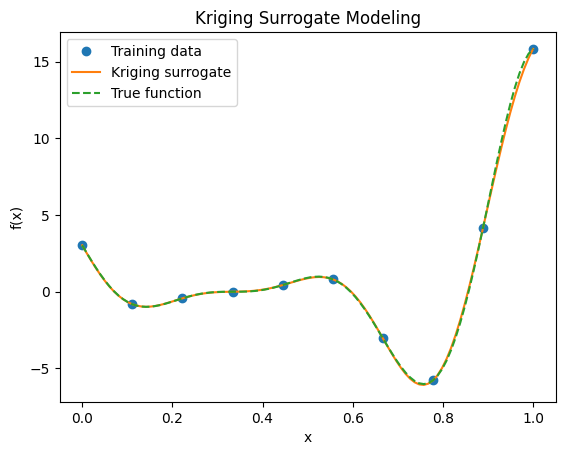

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from smt.surrogate_models import KRG

# Define the function
def f(x):
    return (6*x - 2)**2 * np.sin(12*x - 4)

# Training data
x_train = np.linspace(0, 1, 10).reshape(-1, 1)
y_train = f(x_train)

# Create Kriging surrogate model
kriging = KRG()
kriging.set_training_values(x_train, y_train)
kriging.train()

# Prediction
x_pred = np.linspace(0, 1, 100).reshape(-1, 1)
y_pred = kriging.predict_values(x_pred)

# Plot the results
plt.plot(x_train, y_train, 'o', label='Training data')
plt.plot(x_pred, y_pred, '-', label='Kriging surrogate')
plt.plot(x_pred, f(x_pred), '--', label='True function')
plt.title('Kriging Surrogate Modeling')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()
